In [ ]:
#!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric


In [ ]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00


In [ ]:
import torch
from torch_geometric.nn import RGCNConv
from torch_geometric.nn import GCNConv

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/implicit_explicit_labels.csv')

In [ ]:
df1

,source,target,relation,label
0,fun,dress,catching,ADD
1,fun,dress,catching,ADD
2,fun,dress,catching,ADD
3,fun,jumpsuit,features,ADD
4,fun,jumpsuit,features,ADD
...,...,...,...,...
5094,fabric,Sandro,featuring,NO CHANGE
5095,fabric,lacing,features,NO CHANGE
5096,fabric,kind,provides,NO CHANGE
5097,fabric,denim,ruffled,NO CHANGE


In [ ]:
df = df1[df1['type']=='Explicit']

In [ ]:
df

,source,target,relation,label,type
0,fun,dress,catching,NO CHANGE,Explicit
1,fun,dress,catching,NO CHANGE,Explicit
2,fun,dress,catching,NO CHANGE,Explicit
3,fun,jumpsuit,features,NO CHANGE,Explicit
4,fun,jumpsuit,features,NO CHANGE,Explicit
...,...,...,...,...,...
458,blouse,Jackie,made,NO CHANGE,Explicit
459,blouse,arms,has,NO CHANGE,Explicit
460,blouse,Herdis,inspired,NO CHANGE,Explicit
461,blouse,Herdis,inspired,NO CHANGE,Explicit


In [ ]:
df.info()
# Identify unique nodes
unique_sources = set(df['source'])
unique_targets = set(df['target'])
unique_nodes = unique_sources.union(unique_targets)
print(f"Number of unique nodes: {len(unique_nodes)}")

# Identify unique relationships
unique_relationships = set(df['relation'])
print(f"Number of unique relationships: {len(unique_relationships)}")

# Number of features per node
feature_size = df.shape[1] - 1  # Subtract 1 if there's an identifier column
print(f"Number of features per node: {feature_size}")

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 0 to 462
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   source    463 non-null    object
 1   target    463 non-null    object
 2   relation  463 non-null    object
 3   label     463 non-null    object
 4   type      463 non-null    object
dtypes: object(5)
memory usage: 21.7+ KB
Number of unique nodes: 199
Number of unique relationships: 80
Number of features per node: 4


In [ ]:
df

,source,target,relation,label,type
0,fun,dress,catching,NO CHANGE,Explicit
1,fun,dress,catching,NO CHANGE,Explicit
2,fun,dress,catching,NO CHANGE,Explicit
3,fun,jumpsuit,features,NO CHANGE,Explicit
4,fun,jumpsuit,features,NO CHANGE,Explicit
...,...,...,...,...,...
458,blouse,Jackie,made,NO CHANGE,Explicit
459,blouse,arms,has,NO CHANGE,Explicit
460,blouse,Herdis,inspired,NO CHANGE,Explicit
461,blouse,Herdis,inspired,NO CHANGE,Explicit


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   source        1618 non-null   object
 1   target        1618 non-null   object
 2   relationship  1618 non-null   object
 3   label         1618 non-null   object
dtypes: object(4)
memory usage: 50.7+ KB


In [ ]:
df.drop('type', axis=1, inplace=True)

<ipython-input-247-855b7e6d449d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('type', axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 0 to 462
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   source    463 non-null    object
 1   target    463 non-null    object
 2   relation  463 non-null    object
 3   label     463 non-null    object
dtypes: object(4)
memory usage: 18.1+ KB


In [ ]:
print("Unique labels:", df['label'].unique())
print("Label distribution:", df['label'].value_counts())


Unique labels: ['NO CHANGE']
Label distribution: label
NO CHANGE    463
Name: count, dtype: int64


# Nov.03

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import RGCNConv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


In [ ]:

# Encode nodes and relationships
source_encoder = LabelEncoder()
target_encoder = LabelEncoder()
relationship_encoder = LabelEncoder()
label_encoder = LabelEncoder()

df['source'] = source_encoder.fit_transform(df['source'])
df['target'] = target_encoder.fit_transform(df['target'])
df['relation'] = relationship_encoder.fit_transform(df['relation'])
df['label'] = label_encoder.fit_transform(df['label'])

<ipython-input-250-1b29806ed52b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source'] = source_encoder.fit_transform(df['source'])
<ipython-input-250-1b29806ed52b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = target_encoder.fit_transform(df['target'])
<ipython-input-250-1b29806ed52b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
df

,source,target,relation,label
0,2,90,13,0
1,2,90,13,0
2,2,90,13,0
3,2,113,38,0
4,2,113,38,0
...,...,...,...,...
458,0,28,58,0
459,0,55,53,0
460,0,24,54,0
461,0,24,54,0


In [ ]:
# 1. Data Setup
num_nodes = 463 #Ensure this matches the total nodes in the graph
feature_size = 16 # Set the number of features per node

# Node features should include all nodes
x = torch.randn((num_nodes, feature_size))
print("Node feature shape (x):", x.shape)  # Debug

# Edge index should define all edges in the graph
edge_index = torch.tensor(df[['source', 'target']].values.T, dtype=torch.long)
edge_type = torch.tensor(df['relation'].values, dtype=torch.long)
print("Edge index shape:", edge_index.shape)  # Debug
print("Edge type shape:", edge_type.shape)    # Debug

# Encode labels and ensure they cover all nodes
labels = torch.tensor(df['label'].values, dtype=torch.long)
print("Labels shape:", labels.shape)  # Should print (1618,)

# 2. Train/Test Split and Mask Setup
train_indices, test_indices = train_test_split(range(num_nodes), test_size=0.2, random_state=42)
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_indices] = True
test_mask[test_indices] = True
print("Train mask shape:", train_mask.shape)  # Debug
print("Test mask shape:", test_mask.shape)    # Debug


Node feature shape (x): torch.Size([463, 16])
Edge index shape: torch.Size([2, 463])
Edge type shape: torch.Size([463])
Labels shape: torch.Size([463])
Train mask shape: torch.Size([463])
Test mask shape: torch.Size([463])


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# 1. Split the data into train and test
train_indices, test_indices = train_test_split(range(num_nodes), test_size=0.2, random_state=42)

# Create train and test masks
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_indices] = True
test_mask[test_indices] = True

# 2. Define the evaluation function
def evaluate_with_metrics(mask):
    model.eval()
    with torch.no_grad():
        # Forward pass
        out = model(x, edge_index, edge_type)
        pred = out.argmax(dim=1)  # Predicted labels
        true_labels = labels[mask].cpu().numpy()
        pred_labels = pred[mask].cpu().numpy()

        # Compute metrics
        accuracy = (pred[mask] == labels[mask]).sum().item() / mask.sum().item()
        f1 = f1_score(true_labels, pred_labels, average="weighted")
        precision = precision_score(true_labels, pred_labels, average="weighted")
        recall = recall_score(true_labels, pred_labels, average="weighted")

    return accuracy, f1, precision, recall

# 3. Train the RGCN model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(x, edge_index, edge_type)
    loss = criterion(out[train_mask], labels[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()
import time

start_time = time.time()

# Training the model
for epoch in range(100):
    loss = train()
end_time = time.time()

elapsed_time = end_time - start_time


# 4. Evaluate the model on the test set
test_acc, test_f1, test_precision, test_recall = evaluate_with_metrics(test_mask)

# 5. Print results
print(f"Elapsed time: {elapsed_time} seconds")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")



Elapsed time: 5.04958701133728 seconds
Test Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000


# RGCN With Dropout

In [ ]:
# Define the RGCN Model with Dropout
from torch.nn import Dropout
class RGCNWithDropout(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_relations):
        super(RGCNWithDropout, self).__init__()
        self.conv1 = RGCNConv(in_channels, hidden_channels, num_relations)
        self.conv2 = RGCNConv(hidden_channels, hidden_channels, num_relations)
        self.conv3 = RGCNConv(hidden_channels, out_channels, num_relations)
        self.dropout = Dropout(p=0.5)

    def forward(self, x, edge_index, edge_type):
        x = self.conv1(x, edge_index, edge_type)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index, edge_type)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.conv3(x, edge_index, edge_type)
        return x

# Initialize model, optimizer, and loss function
num_classes = len(label_encoder.classes_)
num_relations = len(relationship_encoder.classes_)
hidden_channels = 16

model = RGCNWithDropout(in_channels=feature_size, hidden_channels=hidden_channels, out_channels=num_classes, num_relations=num_relations)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

# Training Loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(x, edge_index, edge_type)  # Forward pass; should output [1618, num_classes]

    # Ensure shapes match
    assert out.shape[0] == num_nodes, f"Expected output shape [1618, num_classes], got {out.shape}"

    # Calculate loss on the training data
    loss = criterion(out[train_mask], labels[train_mask])
    loss.backward()
    optimizer.step()




# Evaluation
model.eval()
with torch.no_grad():
    out = model(x, edge_index, edge_type)
    predictions = out[test_mask].argmax(dim=1)
    test_accuracy = (predictions == labels[test_mask]).sum().item() / test_mask.sum().item()
    print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9660


# Step 1: Define the Model

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import RGCNConv
from torch.nn import Dropout
import random

# Define Augmented RGCN Model with Dropout
class AugmentedRGCNEmbedding(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, embedding_dim, num_relations, dropout_prob=0.5):
        super(AugmentedRGCNEmbedding, self).__init__()
        self.conv1 = RGCNConv(in_channels, hidden_channels, num_relations)
        self.conv2 = RGCNConv(hidden_channels, embedding_dim, num_relations)
        self.dropout = Dropout(p=dropout_prob)

    def forward(self, x, edge_index, edge_type, mask=None):
        if mask is not None:
            x = x.clone()
            x[mask] = 0  # Apply node masking

        x = self.conv1(x, edge_index, edge_type)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index, edge_type)
        return x

# Helper functions for augmentation and contrastive loss
def get_random_mask(num_nodes, mask_ratio=0.1):
    mask_size = int(num_nodes * mask_ratio)
    mask_indices = torch.randperm(num_nodes)[:mask_size]
    mask = torch.zeros(num_nodes, dtype=torch.bool)
    mask[mask_indices] = True
    return mask

def drop_edges(edge_index, edge_type, drop_ratio=0.1):
    num_edges = edge_index.size(1)
    keep_size = int(num_edges * (1 - drop_ratio))
    perm = torch.randperm(num_edges)[:keep_size]
    return edge_index[:, perm], edge_type[perm]

def contrastive_loss(embeddings1, embeddings2, temperature=0.5):
    embeddings1 = F.normalize(embeddings1, dim=1)
    embeddings2 = F.normalize(embeddings2, dim=1)
    similarity_matrix = torch.mm(embeddings1, embeddings2.t())
    batch_size = embeddings1.size(0)
    labels = torch.arange(batch_size).to(embeddings1.device)
    return F.cross_entropy(similarity_matrix / temperature, labels)




In [ ]:
# Initialize model and optimizer
embedding_dim = 32
model = AugmentedRGCNEmbedding(
    in_channels=feature_size, hidden_channels=32, embedding_dim=embedding_dim,
    num_relations=num_relations, dropout_prob=0.5
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
import time

start_time = time.time()
# Training loop with augmentation, node masking, and contrastive learning
epochs = 100
mask_ratio = 0.1
edge_drop_ratio = 0.1
temperature = 0.1
training_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Generate augmented views with random masks and edge drops
    node_mask_1 = get_random_mask(num_nodes, mask_ratio=mask_ratio)
    node_mask_2 = get_random_mask(num_nodes, mask_ratio=mask_ratio)
    augmented_edge_index_1, augmented_edge_type_1 = drop_edges(edge_index, edge_type, drop_ratio=edge_drop_ratio)
    augmented_edge_index_2, augmented_edge_type_2 = drop_edges(edge_index, edge_type, drop_ratio=edge_drop_ratio)

    # Forward pass for both augmented views
    embeddings_view_1 = model(x, augmented_edge_index_1, augmented_edge_type_1, mask=node_mask_1)
    embeddings_view_2 = model(x, augmented_edge_index_2, augmented_edge_type_2, mask=node_mask_2)

    # Calculate contrastive loss
    loss = contrastive_loss(embeddings_view_1, embeddings_view_2, temperature=temperature)
    loss.backward()
    optimizer.step()

    # Record the training loss
    training_losses.append(loss.item())
    print(f"Epoch {epoch}, Loss: {loss.item()}")

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")
# Optional: Print all training losses after completion
print("Training losses over epochs:", training_losses)

Epoch 0, Loss: 7.628459453582764
Epoch 1, Loss: 7.5686354637146
Epoch 2, Loss: 7.71118688583374
Epoch 3, Loss: 7.5766520500183105
Epoch 4, Loss: 7.684039115905762
Epoch 5, Loss: 7.562856197357178
Epoch 6, Loss: 7.460357189178467
Epoch 7, Loss: 7.419750690460205
Epoch 8, Loss: 7.464969158172607
Epoch 9, Loss: 7.473328590393066
Epoch 10, Loss: 7.340290069580078
Epoch 11, Loss: 7.372635841369629
Epoch 12, Loss: 7.530324459075928
Epoch 13, Loss: 7.492166519165039
Epoch 14, Loss: 7.374775409698486
Epoch 15, Loss: 7.382382869720459
Epoch 16, Loss: 7.215997219085693
Epoch 17, Loss: 7.241158485412598
Epoch 18, Loss: 7.2957258224487305
Epoch 19, Loss: 7.285615921020508
Epoch 20, Loss: 7.298707485198975
Epoch 21, Loss: 7.1413092613220215
Epoch 22, Loss: 7.208436965942383
Epoch 23, Loss: 7.151031970977783
Epoch 24, Loss: 7.101893901824951
Epoch 25, Loss: 7.210928916931152
Epoch 26, Loss: 7.077795028686523
Epoch 27, Loss: 7.228288173675537
Epoch 28, Loss: 7.270550727844238
Epoch 29, Loss: 7.111299

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Switch model to evaluation mode and generate embeddings
model.eval()
with torch.no_grad():
    embeddings = model(x, edge_index, edge_type)  # Generate embeddings for all nodes

# Split embeddings and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    embeddings.cpu().numpy(), labels.cpu().numpy(), test_size=0.2, random_state=42
)

# Train a classifier (e.g., Logistic Regression)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Test Accuracy: 0.9660
F1 Score: 0.9493
Precision: 0.9332
Recall: 0.9660


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Check the unique labels in the dataset
print("Unique labels in the dataset:", torch.unique(labels))

# Count the distribution of each class in the labels
print("Label distribution:", torch.unique(labels, return_counts=True))


Unique labels in the dataset: tensor([0, 1])
Label distribution: (tensor([0, 1]), tensor([4104,  160]))


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Switch model to evaluation mode and generate embeddings
model.eval()
with torch.no_grad():
    embeddings = model(x, edge_index, edge_type).cpu().numpy()  # Generate embeddings for all nodes
    labels_np = labels.cpu().numpy()  # Convert labels to numpy for sklearn

# Split embeddings and labels with stratification
X_train, X_test, y_train, y_test = train_test_split(
    embeddings,
    labels_np,
    test_size=0.2,
    random_state=42,
    stratify=labels_np  # Ensure class balance in splits
)

# Check the distribution of classes in y_train and y_test
print("y_train distribution:", np.unique(y_train, return_counts=True))
print("y_test distribution:", np.unique(y_test, return_counts=True))


y_train distribution: (array([0, 1]), array([3283,  128]))
y_test distribution: (array([0, 1]), array([821,  32]))


In [ ]:
print("Shape of edge_index:", edge_index.shape)  # Should be [2, num_edges]
print("Number of edges in edge_index:", edge_index.size(1))


Shape of edge_index: torch.Size([2, 4264])
Number of edges in edge_index: 4264


In [ ]:
'''Explicit = {Test Accuracy: 0.9509
F1 Score: 0.9270
Precision: 0.9042
Recall: 0.9509}'''

'Explicit = {Test Accuracy: 0.9509\nF1 Score: 0.9270\nPrecision: 0.9042\nRecall: 0.9509}'

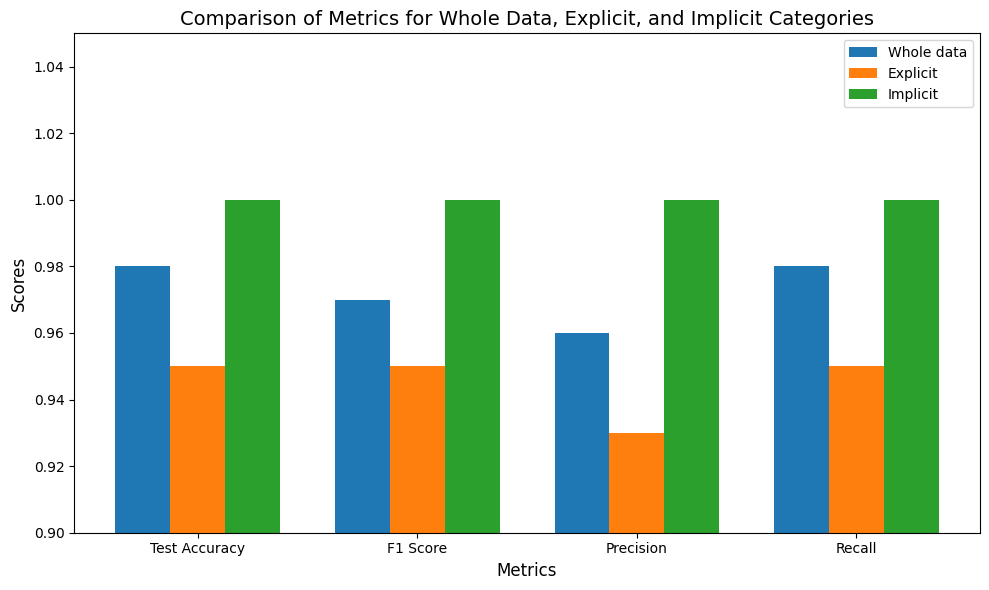

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
categories = ['Test Accuracy', 'F1 Score', 'Precision', 'Recall']
whole_data = [0.98, 0.97, 0.96, 0.98]
explicit = [0.95, 0.95, 0.93, 0.95]
implicit = [1.0, 1.0, 1.0, 1.0]

# Bar width and positions
x = np.arange(len(categories))
bar_width = 0.25

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, whole_data, width=bar_width, label='Whole data')
plt.bar(x, explicit, width=bar_width, label='Explicit')
plt.bar(x + bar_width, implicit, width=bar_width, label='Implicit')

# Add labels and title
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Metrics for Whole Data, Explicit, and Implicit Categories', fontsize=14)
plt.xticks(x, categories, fontsize=10)
plt.ylim(0.9, 1.05)  # Adjust y-axis range to focus on differences
plt.legend(fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
import gravis as gv
import networkx as nx
import pandas as pd

In [ ]:
df = pd.read_csv('/content/labels_final.csv')

In [ ]:
df

,Unnamed: 0,source,target,relationship,label
0,0,ACACIA CORONADO,BUSINESS,covers,no change
1,1,ACACIA CORONADO,CRIME,covers,no change
2,2,ACACIA CORONADO,POLITICS,covers,no change
3,3,ACACIA CORONADO,SPORTS,covers,no change
4,4,ANTHONY IZAGUIRRE,POLITICS,covers,no change
...,...,...,...,...,...
1613,1613,vote,S.V. Date,is written by,no change
1614,1614,vote,Sanjana Karanth,is written by,no change
1615,1615,vote,Sara Boboltz,is written by,no change
1616,1616,vote,Terry Spencer,is written by,no change


In [ ]:
df.drop(columns = ['Unnamed: 0','label'], axis=1, inplace=True)

KeyError: "['Unnamed: 0', 'label'] not found in axis"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   source        1618 non-null   object
 1   target        1618 non-null   object
 2   relationship  1618 non-null   object
dtypes: object(3)
memory usage: 38.0+ KB


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Create a directed graph
G = nx.DiGraph(df)

In [ ]:
# Add edges with relationship as an edge attribute
for _, row in df.iterrows():
    G.add_edge(row['source'], row['target'], relationship=row['relationship'])

# Assign node colors: Blue for source, Red for target
for node in G.nodes():
    if node in df['source'].values:
        G.nodes[node]['color'] = 'blue'
    elif node in df['target'].values:
        G.nodes[node]['color'] = 'red'

# Assign node sizes based on degree centrality
centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, centrality, 'size')



In [ ]:
# Visualize using Gravis
gv.d3(G)


In [ ]:
fig = gv.d3(G, use_node_size_normalization=True, node_size_normalization_max=30,
            use_edge_size_normalization=True, edge_size_data_source='weight', edge_curvature=0.3,
            zoom_factor=0.6)

In [ ]:
fig

In [ ]:
fig.export_html('RGCN.html')

In [ ]:

import IPython

svg_text = fig.to_svg()
IPython.display.SVG(svg_text)

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 1378, in run
    self.function(*self.args, **self.kwargs)
  File "/usr/local/lib/python3.10/dist-packages/gravis/_internal/plotting/rendering.py", line 31, in open_browser_and_stop_server
    driver = create_driver(tmpdir)
  File "/usr/local/lib/python3.10/dist-packages/gravis/_internal/plotting/rendering.py", line 104, in create_chrome_driver
    from selenium import webdriver
ModuleNotFoundError: No module named 'selenium'
